In [1]:
import mlflow
import plotly.express as px

In [2]:
mlflow_tracking_uri = 'sqlite:///ml_experiments.db'
mlflow.set_tracking_uri(mlflow_tracking_uri)
experiments = mlflow.search_experiments()
print(*experiments, sep='\n')

<Experiment: artifact_location='/home/bbelucci/code/recursive_clustering/mlruns/1', creation_time=1733929479465, experiment_id='1', last_update_time=1733929479465, lifecycle_stage='active', name='base_experiment', tags={}>
<Experiment: artifact_location='/home/bbelucci/code/recursive_clustering/mlruns/0', creation_time=1733929479458, experiment_id='0', last_update_time=1733929479458, lifecycle_stage='active', name='Default', tags={}>


In [64]:
runs = mlflow.search_runs(experiment_names=['base_experiment'])

In [65]:
runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.completeness,metrics.load_data_return_elapsed_time,metrics.after_get_metrics_return_elapsed_time,metrics.before_fit_model_return_elapsed_time,...,tags.child_run_id_264,tags.child_run_id_258,tags.child_run_id_298,tags.child_run_id_141,tags.child_run_id_186,tags.child_run_id_169,tags.child_run_id_129,tags.child_run_id_245,tags.child_run_id_215,tags.min_cluster_size
0,1f535e2145864bf78e53eb32ba29f352,1,FINISHED,/home/bbelucci/code/recursive_clustering/mlrun...,2024-12-12 15:01:42.840000+00:00,2024-12-12 15:02:32.266000+00:00,1.000000,0.013585,1.154000e-06,1.107001e-06,...,None,None,None,None,None,None,None,None,None,None
1,0d82103481774be6bdb5a4ea697dca22,1,FINISHED,/home/bbelucci/code/recursive_clustering/mlrun...,2024-12-12 15:01:42.823000+00:00,2024-12-12 15:02:31.793000+00:00,0.624464,0.014108,9.569994e-07,9.489995e-07,...,None,None,None,None,None,None,None,None,None,None
2,0bfd10410ca94c519d44c09d855b74c9,1,FINISHED,/home/bbelucci/code/recursive_clustering/mlrun...,2024-12-12 15:01:42.807000+00:00,2024-12-12 15:02:31.458000+00:00,0.996103,0.013541,1.021999e-06,1.048000e-06,...,None,None,None,None,None,None,None,None,None,None
3,46a8ac3840ad469a92cf152698d0cd25,1,FINISHED,/home/bbelucci/code/recursive_clustering/mlrun...,2024-12-12 15:01:42.790000+00:00,2024-12-12 15:02:31.054000+00:00,1.000000,0.014304,1.061000e-06,1.020000e-06,...,None,None,None,None,None,None,None,None,None,None
4,e5111cb607924be68dcb049574de10bc,1,FINISHED,/home/bbelucci/code/recursive_clustering/mlrun...,2024-12-12 15:01:42.774000+00:00,2024-12-12 15:02:30.660000+00:00,0.995272,0.014516,1.019000e-06,1.021999e-06,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,d001d87bd32f448a8653c0ab874101a7,1,FINISHED,/home/bbelucci/code/recursive_clustering/mlrun...,2024-12-11 15:04:49.274000+00:00,2024-12-11 15:04:56.098000+00:00,0.500000,0.002200,2.057001e-06,2.223001e-06,...,None,None,None,None,None,None,None,None,None,None
1224,0b1bd26acdb94bf4938c1adb16e9c8c8,1,FINISHED,/home/bbelucci/code/recursive_clustering/mlrun...,2024-12-11 15:04:49.255000+00:00,2024-12-11 15:04:55.776000+00:00,0.500000,0.003190,1.017999e-06,1.142001e-06,...,None,None,None,None,None,None,None,None,None,None
1225,78c2bc1726ee4538a5e0f5188ace8f21,1,FINISHED,/home/bbelucci/code/recursive_clustering/mlrun...,2024-12-11 15:04:49.233000+00:00,2024-12-11 15:04:55.536000+00:00,0.500000,0.001948,1.105001e-06,1.396999e-06,...,None,None,None,None,None,None,None,None,None,None
1226,b8d55581bddd49769132e5e4c03abbe6,1,FINISHED,/home/bbelucci/code/recursive_clustering/mlrun...,2024-12-11 15:04:49.184000+00:00,2024-12-11 15:04:55.353000+00:00,0.500000,0.002362,1.054001e-06,1.159000e-06,...,None,None,None,None,None,None,None,None,None,None


In [66]:
str_columns = [
    'tags.parent_run_id',
    'status',
    'start_time',
]
float_columns = [
    'metrics.rand_score',
    'metrics.mutual_info',
    'metrics.v_measure',
    'metrics.silhouette',
    'metrics.adjusted_rand',
    'metrics.homogeneity',
    'metrics.n_clusters_',
    'metrics.completeness',
    'metrics.adjusted_mutual_info',
    'metrics.best_rand_score',
    'metrics.best_mutual_info',
    'metrics.best_v_measure',
    'metrics.best_silhouette',
    'metrics.best_adjusted_rand',
    'metrics.best_homogeneity',
    'metrics.best_n_clusters_',
    'metrics.best_completeness',
    'metrics.best_adjusted_mutual_info',
    'params.repetitions',
    'params.kmeans_n_clusters',
    'params.components_size',
    'params.n_samples',
    'params.n_random',
    'params.n_informative',
    'params.class_sep',
    'params.n_classes',
    'params.min_cluster_size'
]
columns = str_columns + float_columns

In [67]:
runs[float_columns] = runs[float_columns].astype(float)

In [68]:
parent_runs = runs.groupby('tags.parent_run_id').first().copy().reset_index()

In [69]:
parent_runs[columns].sort_values('start_time', ascending=False)

,tags.parent_run_id,status,start_time,metrics.rand_score,metrics.mutual_info,metrics.v_measure,metrics.silhouette,metrics.adjusted_rand,metrics.homogeneity,metrics.n_clusters_,...,metrics.best_adjusted_mutual_info,params.repetitions,params.kmeans_n_clusters,params.components_size,params.n_samples,params.n_random,params.n_informative,params.class_sep,params.n_classes,params.min_cluster_size
8,f2e81dab9d0f4b1b8aeb333e01b24899,FINISHED,2024-12-12 15:01:42.840000+00:00,1.000000,1.609438,1.000000,0.497247,1.000000,1.000000,5.0,...,NaN,10.0,2.0,16.0,1000.0,0.0,10000.0,100.0,5.0,NaN
5,961c06819bea4b90b672e6d5ad66a4f3,FINISHED,2024-12-12 14:58:31.205000+00:00,1.000000,1.609438,1.000000,0.817589,1.000000,1.000000,5.0,...,NaN,10.0,5.0,26.0,1000.0,0.0,1000.0,100.0,5.0,NaN
4,908bb1e1d08543f3b44bdcd87e325e37,FINISHED,2024-12-12 14:54:45.842000+00:00,0.840454,1.586920,0.609275,-0.026546,0.287219,0.986009,75.0,...,NaN,10.0,3.0,13.0,1000.0,0.0,1000.0,10.0,5.0,NaN
6,9b47519f377044c78a7790d3c269db49,FINISHED,2024-12-12 14:34:22.607000+00:00,0.922641,1.609438,0.686815,0.220702,0.716111,1.000000,115.0,...,NaN,8.0,10.0,13.0,1000.0,0.0,100.0,10.0,5.0,NaN
2,771ecd1387a340378e2cfaaeee0385c9,FINISHED,2024-12-11 17:05:20.188000+00:00,0.980360,2.302585,0.848869,0.647089,0.879371,1.000000,144.0,...,NaN,10.0,10.0,4.0,1000.0,100.0,1000.0,100.0,10.0,NaN
9,fc7e2bdf2483437c918a09762c74c179,FINISHED,2024-12-11 16:55:31.615000+00:00,0.900901,2.302585,0.500000,-1.000000,0.000000,1.000000,1000.0,...,NaN,7.0,9.0,11.0,1000.0,100.0,10000.0,10.0,10.0,NaN
0,0f8163e503744dccb5479aa240bfe6f0,SCHEDULED,2024-12-11 16:53:16.089000+00:00,0.835752,0.138430,0.054941,-0.006138,0.001541,0.060119,26.0,...,NaN,3.0,8.0,30.0,1000.0,100.0,10000.0,10.0,10.0,NaN
3,85c841635fa9452da6ef7a492f902aa2,FINISHED,2024-12-11 16:35:04.560000+00:00,0.266505,0.161243,0.115192,-0.012436,0.003237,0.070027,6.0,...,NaN,NaN,NaN,NaN,1000.0,100.0,10000.0,10.0,10.0,7.0
7,d26ad16527dd406f817bdc29b034bdeb,FINISHED,2024-12-11 16:32:15.244000+00:00,0.090909,0.000000,0.000000,-1.000000,0.000000,0.000000,1.0,...,NaN,NaN,NaN,NaN,100.0,100.0,10000.0,10.0,10.0,7.0
1,41270a56708841d7b91de24c4a6c873a,FINISHED,2024-12-11 15:04:54.653000+00:00,0.909091,2.302585,0.666667,-1.000000,0.000000,1.000000,100.0,...,NaN,6.0,9.0,20.0,100.0,100.0,10000.0,10.0,10.0,NaN


In [70]:
recursive_clustering_dimensions = ['params.repetitions', 'params.kmeans_n_clusters', 'params.components_size', 'metrics.silhouette', 'metrics.adjusted_rand',
                                   'metrics.n_clusters_']

In [71]:
dimensions_dict = {
    'RecursiveClustering': recursive_clustering_dimensions,
}

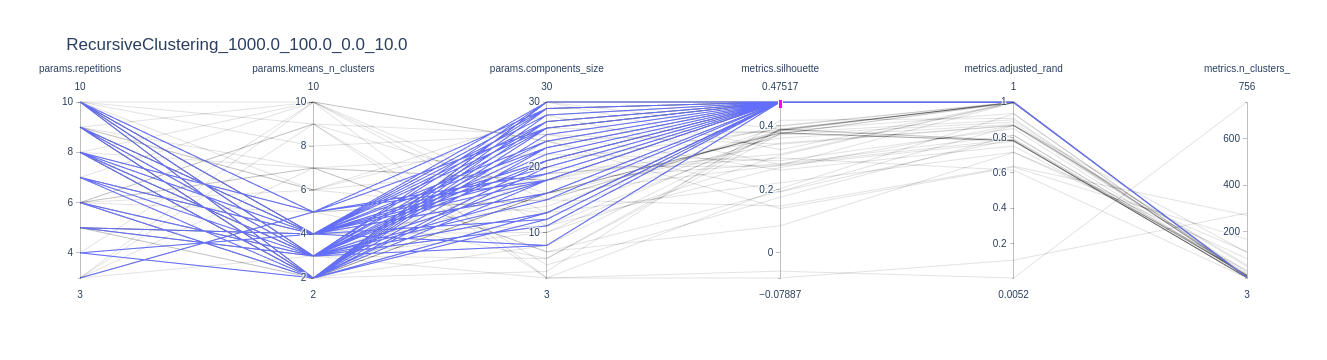

In [79]:
parent_run_id = '9b47519f377044c78a7790d3c269db49'
parent_run = parent_runs.loc[parent_runs['tags.parent_run_id']==parent_run_id]
model_name = parent_run['params.model_nickname'].values[0]
n_samples = parent_run['params.n_samples'].values[0]
n_informative = parent_run['params.n_informative'].values[0]
n_random = parent_run['params.n_random'].values[0]
class_sep = parent_run['params.class_sep'].values[0]
fig_title = f'{model_name}_{n_samples}_{n_informative}_{n_random}_{class_sep}'
df = runs.loc[runs['tags.parent_run_id']==parent_run_id]
# df = df.loc[df['metrics.n_clusters_'] < 10]
fig = px.parallel_coordinates(df, dimensions=dimensions_dict[model_name], width=None, height=500, title=fig_title)
fig.show()

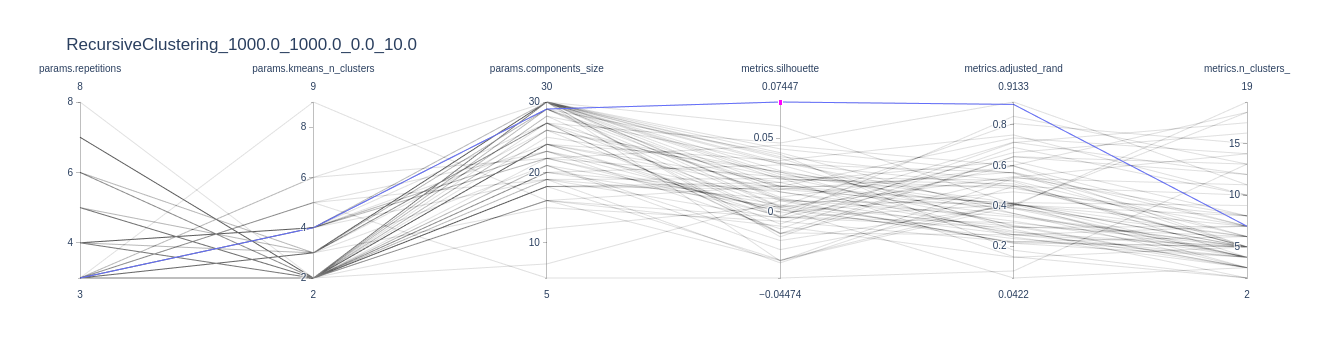

In [73]:
parent_run_id = '908bb1e1d08543f3b44bdcd87e325e37'
parent_run = parent_runs.loc[parent_runs['tags.parent_run_id']==parent_run_id]
model_name = parent_run['params.model_nickname'].values[0]
n_samples = parent_run['params.n_samples'].values[0]
n_informative = parent_run['params.n_informative'].values[0]
n_random = parent_run['params.n_random'].values[0]
class_sep = parent_run['params.class_sep'].values[0]
fig_title = f'{model_name}_{n_samples}_{n_informative}_{n_random}_{class_sep}'
df = runs.loc[runs['tags.parent_run_id']==parent_run_id]
df = df.loc[df['metrics.n_clusters_'] < 20]
fig = px.parallel_coordinates(df, dimensions=dimensions_dict[model_name], width=None, height=500, title=fig_title)
fig.show()

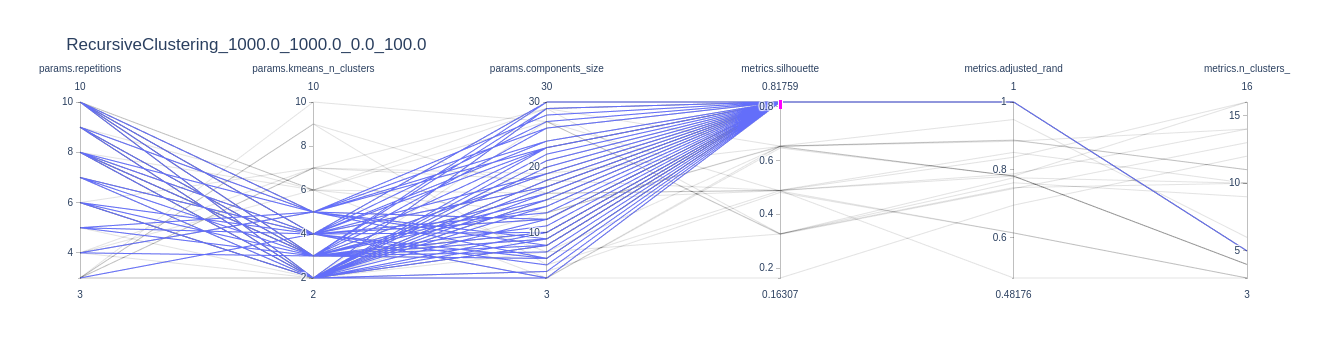

In [74]:
parent_run_id = '961c06819bea4b90b672e6d5ad66a4f3'
parent_run = parent_runs.loc[parent_runs['tags.parent_run_id']==parent_run_id]
model_name = parent_run['params.model_nickname'].values[0]
n_samples = parent_run['params.n_samples'].values[0]
n_informative = parent_run['params.n_informative'].values[0]
n_random = parent_run['params.n_random'].values[0]
class_sep = parent_run['params.class_sep'].values[0]
fig_title = f'{model_name}_{n_samples}_{n_informative}_{n_random}_{class_sep}'
df = runs.loc[runs['tags.parent_run_id']==parent_run_id]
df = df.loc[df['metrics.n_clusters_'] < 20]
fig = px.parallel_coordinates(df, dimensions=dimensions_dict[model_name], width=None, height=500, title=fig_title)
fig.show()

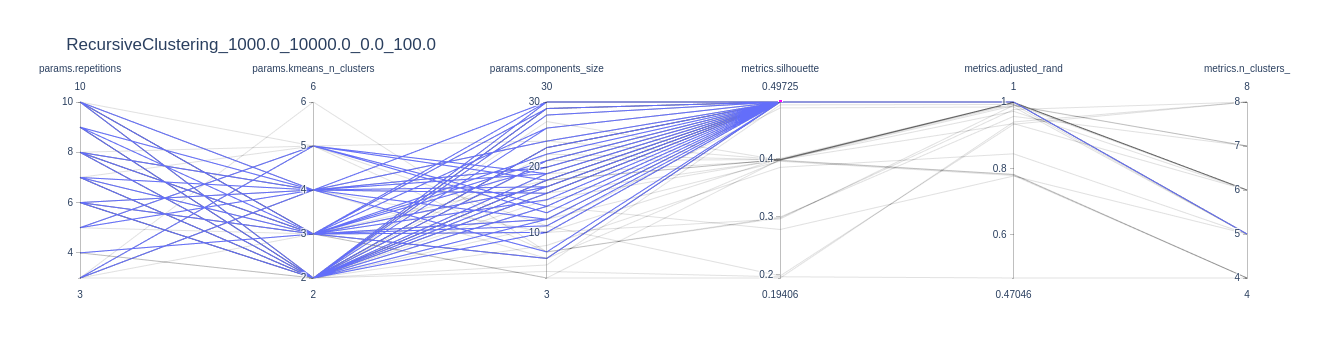

In [80]:
parent_run_id = 'f2e81dab9d0f4b1b8aeb333e01b24899'
parent_run = parent_runs.loc[parent_runs['tags.parent_run_id']==parent_run_id]
model_name = parent_run['params.model_nickname'].values[0]
n_samples = parent_run['params.n_samples'].values[0]
n_informative = parent_run['params.n_informative'].values[0]
n_random = parent_run['params.n_random'].values[0]
class_sep = parent_run['params.class_sep'].values[0]
fig_title = f'{model_name}_{n_samples}_{n_informative}_{n_random}_{class_sep}'
df = runs.loc[runs['tags.parent_run_id']==parent_run_id]
df = df.loc[df['metrics.n_clusters_'] < 10]
fig = px.parallel_coordinates(df, dimensions=dimensions_dict[model_name], width=None, height=500, title=fig_title)
fig.show()